In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from autocrop import crop
import cv2

Importing images and titles ('class') into arrays

In [2]:
def create_dataset(img_folder):
    """
    img_folder is the directory.
    Imports images that are in files with similar types ie the img_folder contains folders with images in folders of the same input copy
    I found this here: https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
    """ 

    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.IMREAD_COLOR)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name
img_data_array, class_name =create_dataset(r'../digital')

30
['100', '100', '100', '1000', '1000', '1000', '10000', '10000', '10000', '100000', '30', '30', '30', '300', '300', '300', '3000', '3000', '3000']


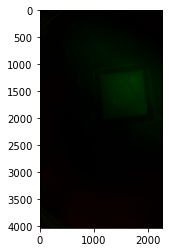

In [3]:
plt.imshow(img_data_array[10]) #testing 
print(class_name[10])
print(class_name) # notice that its not in numeric order, order based on left most number.

Putting data into dataframe to make CSV and make it distribuatable

In [9]:
data = pd.DataFrame({'Images':img_data_array, 'Copy Nimber':class_name})
data.to_csv('QIAML_Data.csv', sep=',', na_rep='', float_format=None, columns=None,
                 header=True, index=False, compression=None)

In [4]:
crop(img_data_array[10])

error: OpenCV(4.5.2) ../modules/imgproc/src/clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'
